In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
Airlines = pd.read_csv("E:/DataScience/Assignments/Clustering/EastWestAirlines.csv")

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
df_airlines = norm_func(Airlines.iloc[:,1:])

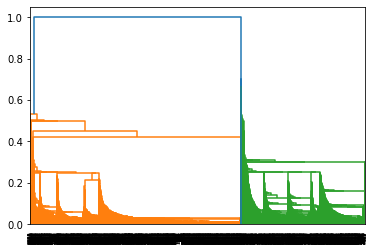

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_airlines, method='single'))

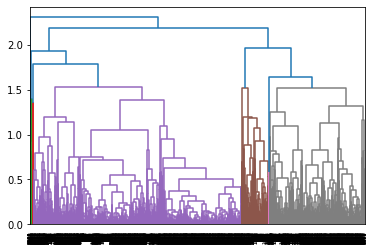

In [7]:
dendrogram1 = sch.dendrogram(sch.linkage(df_airlines, method='complete'))

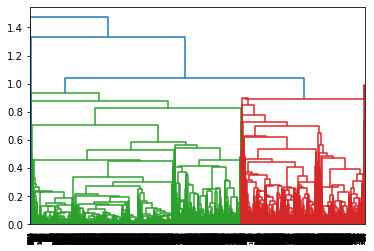

In [8]:
dendrogram2 = sch.dendrogram(sch.linkage(df_airlines, method='centroid'))

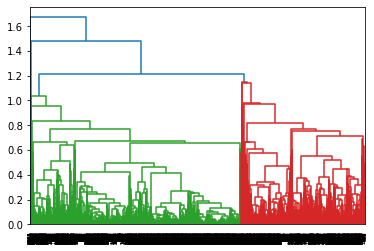

In [9]:
dendrogram3 = sch.dendrogram(sch.linkage(df_airlines, method='average'))

In [10]:
c = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage= 'complete')

In [11]:
p_c = c.fit_predict(df_airlines)
Clusters=pd.DataFrame(p_c,columns=['Clusters'])

In [12]:
df_airlines['c_clusterid'] = pd.Series(p_c)
df_airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [13]:
df_airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
c_clusterid          0
dtype: int64

In [14]:
Airlines['c_clusterid'] = pd.Series(p_c)
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [15]:
clusters = Airlines.iloc[:,1:].groupby(Airlines.c_clusterid).mean()
clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c_clusterid
c_clusterid,,,,,,,,,,,,
0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000,0.0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1.0
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000,2.0
3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.0
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5.0
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6.0
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,7.0


In [17]:
c1 = AgglomerativeClustering(n_clusters=8, affinity = 'minkowski', linkage= 'complete')

In [19]:
pc = c1.fit_predict(Airlines)
Clusters=pd.DataFrame(pc,columns=['Clusters'])

In [20]:
Airlines['clusterid'] = pd.Series(pc)
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c_clusterid,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [21]:
mclusters = Airlines.iloc[:,1:].groupby(Airlines.clusterid).mean()
mclusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c_clusterid,clusterid
clusterid,,,,,,,,,,,,,
0,3.121651e+05,412.795918,2.989796,1.020408,1.000000,41784.642857,19.357143,1498.836735,4.612245,5396.224490,0.663265,1.265306,0.0
1,5.833051e+04,132.100757,2.010963,1.014357,1.010963,15617.004437,11.237275,412.130253,1.217698,4048.549987,0.354738,1.531976,1.0
2,6.878764e+05,291.625000,3.437500,1.000000,1.187500,52361.750000,23.562500,1754.375000,6.625000,6141.187500,0.812500,1.000000,2.0
3,9.158025e+04,0.000000,4.000000,1.000000,2.000000,212083.000000,18.750000,280.500000,1.250000,3660.250000,1.000000,0.750000,3.0
4,1.184935e+06,1910.000000,3.500000,1.000000,1.000000,44595.500000,22.750000,2237.500000,8.500000,7956.250000,0.750000,1.000000,4.0
5,8.899450e+05,204.800000,3.400000,1.000000,1.000000,93889.800000,18.200000,1230.000000,3.600000,6134.200000,1.000000,0.600000,5.0
6,4.502175e+05,411.300000,3.400000,1.025000,1.000000,57188.550000,19.575000,1622.275000,4.750000,6215.375000,0.775000,1.000000,6.0
7,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,0.000000,7.0
